![Olist](Olist_pics/logo-olist.png)

# Product Category and Business Segment



1. **Is there any Business Segment doing particularly well… or particularly badly? (sellers acquired between Dic,2017-Aug,2018)**
    - Visualization: Aggregates per Product Category (avg_days_to_sale, total_sold_RLB, order_nunique, product_nunique, product_count, total_sellers, selling_sellers)

2. **Is there any Product Category doing particularly well… or particularly badly? (sellers acquired between Dic,2017-Aug,2018)**
    - Visualization: Aggregates per Product Category (unique_order_id, unique_product_id, total_product_id, total_sold_RLB, avg_price_RLB)

In [1]:
#Importing Libraries & set up
import byMontse as byM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from datetime import datetime,date,timedelta 
import datetime as dt
import calendar


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)

# Configure visualizations
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'grid.linestyle': '--','figure.figsize': [12, 10], 'font.size': 16}
sns.set_theme(style='ticks', rc=custom_params)
base_color=sns.color_palette()[0]

In [2]:
seller=pd.read_csv('Olist_saved/seller_df.csv')
byM.datasummary(seller).fillna('').replace(0,'')

Dataset Shape: (765, 32)


,dtypes,count,unique,missing,top,freq,mean,std,min,25%,50%,75%,max,First Value
seller_id,object,765.0,765,,ec5b3cd9d6bf0a880edfda73562a7cea,1,,,,,,,,2c43fb513632d29b3b58df74816f1b06
sdr_id,object,765.0,22,,4b339f9567d060bcea4f5136b9f5949e,137,,,,,,,,a8387c01a09e99ce014107505b92388c
sr_id,object,765.0,18,,4ef15afb4b2723d8f3d81e51ec7afefe,130,,,,,,,,4ef15afb4b2723d8f3d81e51ec7afefe
won_date,object,765.0,146,,2018-04-30,22,,,,,,,,2018-02-26
business_segment,object,765.0,32,,home_decor,96,,,,,,,,pet
lead_type,object,765.0,8,,online_medium,303,,,,,,,,online_medium
lead_behaviour_profile,object,765.0,8,,cat,373,,,,,,,,cat
business_type,object,765.0,3,,reseller,529,,,,,,,,reseller
first_contact_date,object,765.0,180,,2018-02-06,13,,,,,,,,2018-02-21
landing_page_id,object,765.0,122,,b76ef37428e6799c421989521c0e5077,163,,,,,,,,b48ec5f3b04e9068441002a19df93c6c


### 01. Is there any Business Segment doing particularly well … or particularly badly? 
#### (For sellers acquired between Dic,2017 - Aug, 2018)

In [3]:
#unique customers, orders and number of products sold by business segment
business_segment_sum=seller.groupby('business_segment')[['total_sold','customer_nunique', 'order_nunique', 'product_nunique','product_count']].sum().reset_index()
business_segment_suniq=seller.groupby('business_segment')[['seller_id']].nunique().reset_index()

#Merging Aggregations
business_segment_summary=pd.DataFrame(seller.groupby('business_segment')['days_to_first_sale'].mean().reset_index())
business_segment_summary=business_segment_summary.merge(business_segment_sum,on='business_segment').set_index('business_segment')
business_segment_summary=business_segment_summary.merge(business_segment_suniq, on='business_segment').set_index('business_segment')
business_segment_summary['selling_sellers']=seller.loc[seller.product_count>0].groupby('business_segment')[['seller_id']].nunique().astype(int)
#business_segment_summary['product_avg_price']=[business_segment_summary]
#business_segment_summary=business_segment_summary.merge(business_segment_avg, on='business_segment').set_index('business_segment')
business_segment_summary=business_segment_summary.rename(columns={'seller_id':'total_sellers', 'total_sold':'total_sold_RLB', 'avg_price_product':'avg_price', 'days_to_first_sale':'avg_days_to_sale'})

business_segment_summary=business_segment_summary.replace(np.nan, 0)
#print table
business_segment_summary.sort_values('total_sold_RLB', ascending=False).style.bar(subset=['product_count','product_nunique','order_nunique','total_sold_RLB', 'total_sellers', 'avg_days_to_sale','selling_sellers'], align='left', color='lightblue')

,avg_days_to_sale,total_sold_RLB,customer_nunique,order_nunique,product_nunique,product_count,total_sellers,selling_sellers
business_segment,,,,,,,,
watches,48.67,116741.09,576,576,61,590,6,3.00
health_beauty,49.67,90355.36,702,702,354,817,87,45.00
household_utilities,50.41,51459.75,500,500,258,560,65,44.00
audio_video_electronics,45.03,50265.34,249,249,122,275,56,31.00
small_appliances,46.86,47674.87,68,68,32,69,12,7.00
home_decor,60.27,43801.52,356,356,209,448,96,44.00
pet,45.76,40774.83,247,247,108,288,29,17.00
construction_tools_house_garden,53.28,34434.76,270,270,143,318,58,32.00
car_accessories,65.93,30174.98,148,148,105,164,71,30.00


#### Observations:
- The only info Customer_nunique does provide is that we don't have repeating customers in the data, as it is always equal to order_nunique. Column will be deleted

In [4]:
#Visualization: Aggregates per Business Segment
business_segment_summary.drop(columns=['customer_nunique']).sort_values('total_sold_RLB', ascending=False).style.bar(subset=['product_count','product_nunique','order_nunique','total_sold_RLB', 'total_sellers', 'avg_days_to_sale','selling_sellers'], align='left', color='lightblue')

,avg_days_to_sale,total_sold_RLB,order_nunique,product_nunique,product_count,total_sellers,selling_sellers
business_segment,,,,,,,
watches,48.67,116741.09,576,61,590,6,3.00
health_beauty,49.67,90355.36,702,354,817,87,45.00
household_utilities,50.41,51459.75,500,258,560,65,44.00
audio_video_electronics,45.03,50265.34,249,122,275,56,31.00
small_appliances,46.86,47674.87,68,32,69,12,7.00
home_decor,60.27,43801.52,356,209,448,96,44.00
pet,45.76,40774.83,247,108,288,29,17.00
construction_tools_house_garden,53.28,34434.76,270,143,318,58,32.00
car_accessories,65.93,30174.98,148,105,164,71,30.00


In [5]:
#Percentage of selling sellers per busines segment
((business_segment_summary['selling_sellers']/business_segment_summary['total_sellers'])*100).sort_values(ascending=False)

business_segment
home_appliances                    71.43
household_utilities                67.69
air_conditioning                   66.67
bags_backpacks                     63.64
toys                               62.50
baby                               60.00
gifts                              60.00
pet                                58.62
stationery                         58.33
sports_leisure                     58.33
small_appliances                   58.33
audio_video_electronics            55.36
construction_tools_house_garden    55.17
health_beauty                      51.72
music_instruments                  50.00
games_consoles                     50.00
bed_bath_table                     50.00
books                              50.00
watches                            50.00
home_decor                         45.83
car_accessories                    42.25
phone_mobile                       41.67
computers                          40.00
food_drink                         37.50

#### Observations:

- Watches have only 6 sellers with 3 selling sellers (and BRL 116,741 total sold)
- Watches, Health_beauty, Household_utilities and Audio_video_electronics are top sellers with revenue sold > BRL50,000
- Religious, Jewerly, and sellers with missing values in Business Segments have no sales
- Games_consoles, Handcrafted and party segments have sold < BRL1,000 

- Books, Home_appliances, Bed_bath_table and Computers have the shorter avg period from acquisition to first sale
- Food_Drink, Handcrafted and Air_consitioning have the longer avg period from acquisition to first sale.


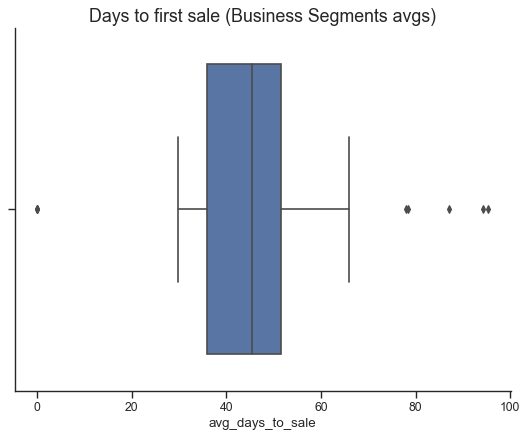

In [6]:
#Distribution of avg_days_to_sale per business segment
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(business_segment_summary['avg_days_to_sale'])
plt.title('Days to first sale (Business Segments avgs)', fontsize=16)
plt.savefig('Olist_saved/DaystoSale_avg.png')

### 02. Is there any product line doing particularly well … or particularly badly? 
#### (For sellers acquired between Dic,2017 - Aug, 2018)

In [7]:
#Loading &Merging datasets
products=pd.read_csv('Olist_data/olist_products_dataset.csv')
order_item=pd.read_csv('Olist_data/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
closed = pd.read_csv('Olist_data/olist_closed_deals_dataset.csv', parse_dates=['won_date'])
products_order=order_item.merge(products, on='product_id', how='left')
products_order_seller=products_order.merge(closed, on='seller_id', how='left')
products_order_seller=products_order_seller.loc[products_order_seller.mql_id.notnull()]
#Aggregates
product_order_category=products_order_seller.groupby('product_category_name')['order_id','product_id'].nunique()
product_order_category=product_order_category.rename(columns={"product_id": "unique_product_id", "order_id": "unique_order_id"})
product_order_category['total_product_id']=products_order_seller.groupby('product_category_name')['product_id'].count()
product_order_category['total_sold_RLB']=products_order_seller.groupby('product_category_name')['price'].sum().astype(int)
product_order_category['avg_price_RLB']=products_order_seller.groupby('product_category_name')['price'].mean().astype(int)
#product_order_category['avg_days_to_sale']=products_order_seller.groupby('product_category_name')['days_to_first_sale'].mean().astype(int)
#Visualization
product_order_category.sort_values('total_sold_RLB', ascending=False).style.bar(subset=['unique_product_id','total_product_id','unique_order_id','total_sold_RLB', 'avg_price_RLB'], align='left', color=['lightblue'])


,unique_order_id,unique_product_id,total_product_id,total_sold_RLB,avg_price_RLB
product_category_name,,,,,
beleza_saude,805,350,916,106920,116
relogios_presentes,581,58,594,103241,173
utilidades_domesticas,535,253,598,63399,106
pet_shop,254,106,294,35076,119
esporte_lazer,299,172,334,29621,88
bebes,140,73,154,27095,175
portateis_casa_forno_e_cafe,31,14,31,26485,854
automotivo,147,99,169,26310,155
telefonia,77,41,79,25069,317


In [8]:
#Translate product categories to English
pcategory=pd.read_csv('Olist_data/olist_product_category_name_translation.csv')
product_order_category=product_order_category.merge(pcategory, on='product_category_name').drop(columns=['product_category_name']).set_index('product_category_name_english')
product_order_category.sort_values('total_sold_RLB', ascending=False).style.bar(subset=['unique_product_id','total_product_id','unique_order_id','total_sold_RLB', 'avg_price_RLB'], align='left', color=['lightblue'])

,unique_order_id,unique_product_id,total_product_id,total_sold_RLB,avg_price_RLB
product_category_name_english,,,,,
health_beauty,805,350,916,106920,116
watches_gifts,581,58,594,103241,173
housewares,535,253,598,63399,106
pet_shop,254,106,294,35076,119
sports_leisure,299,172,334,29621,88
baby,140,73,154,27095,175
small_appliances_home_oven_and_coffee,31,14,31,26485,854
auto,147,99,169,26310,155
telephony,77,41,79,25069,317


#### Observations:
- Health_beauty (350 unique product id)	and watches_gift (58 unique product id) product categories have sold more than 100,000 BRL
- 14 product categories with less than BRL 1000 total sold. (agro_industry_and_commerce, music, drinks, costruction_tools_tools, food_drink, books_imported, books_general_interest, costruction_tools_garden, christmas_supplies, party_supplies, dvds_blu_ray, market_place, arts_and_craftmanship, industry_commerce_and_business
- Per results seems clear than same business unit may have several product categories and viceversa.

In [9]:
#Top5 product categories
product_order_category.sort_values('total_sold_RLB', ascending=False).nlargest(5,'total_sold_RLB').style.bar(subset=['unique_product_id','total_product_id','unique_order_id','total_sold_RLB', 'avg_price_RLB'], align='left', color=['lightblue'])

,unique_order_id,unique_product_id,total_product_id,total_sold_RLB,avg_price_RLB
product_category_name_english,,,,,
health_beauty,805,350,916,106920,116
watches_gifts,581,58,594,103241,173
housewares,535,253,598,63399,106
pet_shop,254,106,294,35076,119
sports_leisure,299,172,334,29621,88


In [10]:
# Bottom 5 product categories
product_order_category.sort_values('total_sold_RLB', ascending=False).nsmallest(5,'total_sold_RLB').style.bar(subset=['unique_product_id','total_product_id','unique_order_id','total_sold_RLB', 'avg_price_RLB'], align='left', color=['lightblue'])

,unique_order_id,unique_product_id,total_product_id,total_sold_RLB,avg_price_RLB
product_category_name_english,,,,,
industry_commerce_and_business,1,1,1,101,101
arts_and_craftmanship,6,5,6,284,47
market_place,2,1,2,287,143
dvds_blu_ray,5,1,5,419,83
party_supplies,7,5,7,457,65


In [11]:
# Top 5 Business Segments
business_segment_summary.sort_values('total_sold_RLB', ascending=False).nlargest(5,'total_sold_RLB').style.bar(subset=['product_count','product_nunique','order_nunique','total_sold_RLB', 'total_sellers', 'avg_days_to_sale','selling_sellers'], align='left', color='lightblue')

,avg_days_to_sale,total_sold_RLB,customer_nunique,order_nunique,product_nunique,product_count,total_sellers,selling_sellers
business_segment,,,,,,,,
watches,48.67,116741.09,576,576,61,590,6,3.00
health_beauty,49.67,90355.36,702,702,354,817,87,45.00
household_utilities,50.41,51459.75,500,500,258,560,65,44.00
audio_video_electronics,45.03,50265.34,249,249,122,275,56,31.00
small_appliances,46.86,47674.87,68,68,32,69,12,7.00


In [12]:
# Top bottom BUsiness Segments
business_segment_summary.sort_values('total_sold_RLB', ascending=False).nsmallest(5,'total_sold_RLB').style.bar(subset=['product_count','product_nunique','order_nunique','total_sold_RLB', 'total_sellers', 'avg_days_to_sale','selling_sellers'], align='left', color='lightblue')

,avg_days_to_sale,total_sold_RLB,customer_nunique,order_nunique,product_nunique,product_count,total_sellers,selling_sellers
business_segment,,,,,,,,
religious,0.00,0.00,0,0,0,0,1,0.00
jewerly,0.00,0.00,0,0,0,0,8,0.00
missing,0.00,0.00,0,0,0,0,1,0.00
party,78.00,388.98,3,3,3,3,4,1.00
handcrafted,94.33,875.90,10,10,5,11,11,3.00


In [13]:
#Business Segments per Product Category
products_order_seller.groupby('product_category_name')['business_segment'].value_counts()

product_category_name                           business_segment               
agro_industria_e_comercio                       audio_video_electronics              3
                                                construction_tools_house_garden      3
                                                computers                            1
alimentos                                       car_accessories                      5
                                                construction_tools_house_garden      5
                                                food_drink                           4
                                                audio_video_electronics              3
                                                household_utilities                  2
                                                health_beauty                        1
alimentos_bebidas                               food_drink                          16
                                                ca

In [14]:
#Product Category per #Business Segment
products_order_seller.groupby('business_segment')['product_category_name'].value_counts()

business_segment                 product_category_name                         
air_conditioning                 eletrodomesticos_2                                  2
                                 construcao_ferramentas_construcao                   1
                                 eletrodomesticos                                    1
audio_video_electronics          beleza_saude                                       62
                                 eletronicos                                        40
                                 informatica_acessorios                             37
                                 telefonia                                          32
                                 cine_foto                                          19
                                 esporte_lazer                                      12
                                 cool_stuff                                          7
                                 eletrodomesticos 

One product category may be linked with more than one business segment and viceversa